# Part 1: Data Exploration

## Part 1.0: Input data and package setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=DeprecationWarning)
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

file_path = './Telco_Churn_dataset.csv'

## Part 1.1: Understand the Raw Dataset

#### Overview of dataset

In [2]:
df = pd.read_csv(file_path)
print ('Num of rows and columns: {} and {}'.format(df.shape[0], df.shape[1]))
df.head()

Num of rows and columns: 3333 and 33


,customerID,gender,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,InternationalPlan,VoiceMailPlan,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalRevenue,Churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,No,No,0,168.8,137,241.4,107,204.8,106,15.5,4,0,354,593.3,No
1,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,Yes,No,0,122.2,112,131.7,94,169.5,106,10.3,9,5,326,280.9,Yes
2,0013-MHZWF,Female,0,No,Yes,9,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),No,Yes,36,178.7,134,178.6,102,126.8,82,8.0,4,2,324,571.5,No
3,0013-SMEOE,Female,1,Yes,No,71,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),No,No,0,190.2,68,262.2,64,130.0,92,8.8,4,0,228,7904.3,No
4,0015-UOCOJ,Female,1,No,No,7,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,No,0,67.7,68,195.7,86,236.5,137,12.0,2,1,294,340.4,No


In [3]:
print(df.shape)
print("================================================================================")
print(df.info())

df.describe()

(3333, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 33 columns):
customerID              3333 non-null object
gender                  3333 non-null object
SeniorCitizen           3333 non-null int64
MaritalStatus           3333 non-null object
Dependents              3333 non-null object
tenure                  3333 non-null int64
PhoneService            3333 non-null object
MultipleLines           3333 non-null object
InternetService         3333 non-null object
OnlineSecurity          3333 non-null object
OnlineBackup            3333 non-null object
DeviceProtection        3333 non-null object
TechSupport             3333 non-null object
StreamingTV             3333 non-null object
StreamingMovies         3333 non-null object
Contract                3333 non-null object
PaperlessBilling        3333 non-null object
PaymentMethod           3333 non-null object
InternationalPlan       3333 non-null object
VoiceMailPlan           3333 

,SeniorCitizen,tenure,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.00000
mean,0.110111,28.001500,8.099010,179.775098,100.435644,200.980348,100.114311,200.872037,100.107711,10.237294,4.479448,1.562856,306.69997
std,0.313075,23.262239,13.688365,54.467389,20.069084,50.713844,19.922625,50.573847,19.568609,2.791840,2.461214,1.315491,34.44939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000,194.00000
25%,0.000000,7.000000,0.000000,143.700000,87.000000,166.600000,87.000000,167.000000,87.000000,8.500000,3.000000,1.000000,284.00000
50%,0.000000,23.000000,0.000000,179.400000,101.000000,201.400000,100.000000,201.200000,100.000000,10.300000,4.000000,1.000000,307.00000
75%,0.000000,48.000000,20.000000,216.400000,114.000000,235.300000,114.000000,235.300000,113.000000,12.100000,6.000000,2.000000,330.00000
max,1.000000,72.000000,51.000000,350.800000,165.000000,363.700000,170.000000,395.000000,175.000000,20.000000,20.000000,9.000000,418.00000


#### Distribution of target values

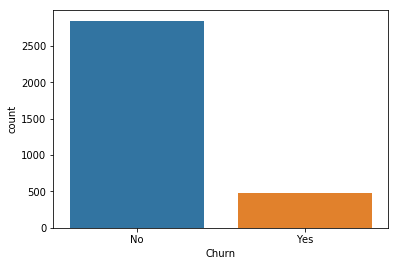

In [4]:
import seaborn as sns
sns.countplot(x="Churn", data=df)

## Part 1.2: Data cleaning

#### Strip text values

In [58]:
#df['TotalRevenue'] = pd.to_numeric(df['TotalRevenue'].tolist(), errors='coerce')
#df.dropna(subset=['TotalRevenue'], how='any', inplace = True)

text_cols = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]
df[text_cols] = df[text_cols].applymap(lambda x: x.strip())

#### Define binary_cols (1 or 0), numeric_cols (ordinal int and float), enc_cols (text requiring encoding) and y_cols

In [48]:
# all_cols = df.columns.tolist()

to_drop_cols = ['customerID', 'PhoneService']  # PhoneService is all 'Yes' in data

# Binary type cols
yes_no_cols = ['MaritalStatus', 'Dependents', 'MultipleLines', 'OnlineSecurity',
               'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
               'StreamingMovies','PaperlessBilling', 'InternationalPlan', 'VoiceMailPlan', ]

one_zero_cols = ['SeniorCitizen']

gender_cols = ['gender']

# text_cols = [key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object']]


# binary_cols = yes_no_cols + one_zero_cols

# Encoding cols
enc_cols = ['InternetService', 'Contract', 'PaymentMethod']

# Numeric cols
numeric_cols = ['tenure',
                 'NumbervMailMessages',
                 'TotalDayMinutes',
                 'TotalDayCalls',
                 'TotalEveMinutes',
                 'TotalEveCalls',
                 'TotalNightMinutes',
                 'TotalNightCalls',
                 'TotalIntlMinutes',
                 'TotalIntlCalls',
                 'CustomerServiceCalls',
                 'TotalCall',
                 'TotalRevenue',
               ]

y_col = 'Churn'
# y_cols = [y_col]
x_cols = yes_no_cols + one_zero_cols + gender_cols + enc_cols + numeric_cols

x_y_cols = x_cols + [y_col]

In [50]:
# Step 1: drop to_drop_cols
# df_processed = df.drop(to_drop_cols, axis=1)
df_processed = df[x_y_cols]

In [51]:
# Step 2: Process binary type cols

# Step 2.1: Change yes_no_cols values to 1 or 0.
df_processed[yes_no_cols] = df_processed[yes_no_cols].applymap(lambda x: 1 if x == 'Yes' else 0)

# Step 2.2: Change gender 
df_processed[gender_cols] = df_processed[gender_cols].applymap(lambda x: 1 if x == 'Male' else 0)


In [52]:
# Step 3: Force numeric cols to be numeric
for c in numeric_cols:
    df_processed[c] = pd.to_numeric(df['TotalRevenue'], errors='coerce')

In [53]:
# Step 4: change y_col values to 1 or 0
df_processed[y_col] = df_processed[y_col].apply(lambda x: 1 if x == 'Yes' else 0)

## Train test sets splitting


In [54]:
from sklearn.model_selection import train_test_split

df_X = df_processed[x_cols]
df_y = df_processed[[y_col]]

df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df_X, df_y, test_size = 0.2, stratify=df_y)

In [55]:
df[y_col].value_counts()

No     2850
Yes     483
Name: Churn, dtype: int64

In [56]:
df_y[y_col].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [57]:
df_processed[y_col].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [59]:
# Import imputer module
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# define individual transformers in a pipeline
categorical_preprocessing = Pipeline(
  steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
  ]
)
numerical_preprocessing = Pipeline(
  steps=[
    ('imputation', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scale', StandardScaler())
  ]
)

# define which transformer applies to which columns
preprocess = ColumnTransformer(
  transformers=[
   ('categorical_preprocessing', categorical_preprocessing, enc_cols),
   ('numerical_preprocessing', numerical_preprocessing, numeric_cols)
  ], 
   remainder ='passthrough'
)

In [84]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import GridSearchCV

# Setup the pipeline
pipeline_cv_train = Pipeline(
  steps=[
    ('preprocess', preprocess),
    # ('clf', SVC())
    ('clf', RandomForestClassifier())
  ]
)

# Specify the hyperparameter space
parameters = {'clf__n_estimators':[50, 100, 200],
              'clf__max_depth':[4, 10, 20, 30]
             }

# Create the GridSearchCV object: gm_cv
gs_cv = GridSearchCV(cv=5,
                     estimator=pipeline_cv_train,
                     param_grid=parameters,
                     scoring='roc_auc'
                    )

# Fit to the training set
gs_cv.fit(df_X_train, df_y_train)
# y_pred_RF = gs_cv.predict(df_X_test)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('categorical_preprocessing',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy

In [83]:
print(gs_cv.best_score_)
print(gs_cv.best_params_)

0.8504084449197372
{'clf__max_depth': 10, 'clf__n_estimators': 200}


### Model training

In [86]:
best_param = gs_cv.best_params_
print(best_param)

# Setup the pipeline
pipeline_train = Pipeline(
  steps=[
    ('preprocess', preprocess),
    ('clf', RandomForestClassifier())
  ]
)

pipeline_train.fit(df_X_train, df_y_train)


{'clf__max_depth': 10, 'clf__n_estimators': 200}


Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('categorical_preprocessing',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                           

In [ ]:
def print_metric()

In [116]:
from sklearn.metrics import precision_score, recall_score, f1_score, auc, roc_curve

accuracy = lambda y_true, y_pred: np.mean(y_true == y_pred) # NumPy interpretes True and False as 1. and 0.

y_train_pred = pipeline_train.predict(df_X_train)
y_train_pred_prob = pipeline_train.predict_proba(df_X_train)[:, 1]

y_train = df_y_train[y_col]

y_test_pred = pipeline_train.predict(df_X_test)
y_test_pred_prob = pipeline_train.predict_proba(df_X_test)[:, 1]

y_test = df_y_test[y_col]


In [121]:
print("test set")
print(accuracy(y_test, y_test_pred), precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred, pos_label=1)
print(auc(fpr, tpr))


print("train set")
print(accuracy(y_train, y_train_pred), precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred))

fpr, tpr, thresholds = roc_curve(y_train, y_train_pred, pos_label=1)
print(auc(fpr, tpr))

test set
0.8710644677661169 0.6 0.3402061855670103
0.6508048471694701
train set
0.9789947486871718 0.9824561403508771 0.8704663212435233
0.9339173711480774


In [ ]:
print("test set")
print(accuracy(y_test, y_test_pred), precision_score(y_test, y_test_pred), recall_score(y_test, y_test_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_test_pred, pos_label=1)
print(auc(fpr, tpr))


print("train set")
print(accuracy(y_train, y_train_pred), precision_score(y_train, y_train_pred), recall_score(y_train, y_train_pred))

fpr, tpr, thresholds = roc_curve(y_train, y_train_pred, pos_label=1)
print(auc(fpr, tpr))